This notebook will explore how optimal entry points might cluster when taking different indicators into account.


In [1]:
import os
os.chdir('../../')
os.getcwd()

&#39;/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing&#39;

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from v2.model import Trading
from v2.strategy.indicators.smma import SMMA
from v2.strategy.indicators.stochastic_oscillator import StochasticOscillator
from v2.strategy.indicators.bollinger_bands import BollingerBands
from v2.strategy.indicators.macd import MACD
from v2.strategy.indicators.param import Param



In [3]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())

In [4]:
datasets = model.dfs
training_set = datasets[0][0]

training_set['trough'] = training_set.iloc[argrelextrema(training_set.close.values, np.less_equal, order=240)[0]]['close']
training_set['peak'] = training_set.iloc[argrelextrema(training_set.close.values, np.greater_equal, order=240)[0]]['close']


    

As you can see, this identifies minimums and maximums over a specific window (order)

In [116]:
plt.scatter(training_set.index, training_set['trough'], c='r')
plt.scatter(training_set.index, training_set['peak'], c='g')
plt.plot(training_set.index, training_set['close'])
plt.show()

KeyboardInterrupt: 

Now let's see if we can train a classifier to identify these points in other datasets using indicators as features.


In [5]:
ema_fast = Param(5, 10000, 0, 'ema_fast', 60)
ema_slow= Param(6, 10001, 0, 'ema_slow', 120)
signal = Param(5, 10001, 0, 'signal', 90)
macd_ = MACD(_params=[ema_fast, ema_slow, signal], _name='macd')
macd_.genData(training_set, gen_new_values=False)
boll_period = Param(5, 10000, 0, 'period', 90)
boll_bands = BollingerBands(_params=[boll_period], _name='bollinger_bands')
boll_bands.genData(training_set, gen_new_values=False)
stoch_highlow = Param(5, 10000, 0, 'highlow_range', 90.0)
stoch_k = Param(5, 10000, 0, 'k_period', 270.0)
stoch_oscillator = StochasticOscillator(_params=[stoch_highlow, stoch_k], _name='stochastic_oscillator')
stoch_oscillator.genData(training_set, gen_new_values=False)
smma_period = Param(5, 10000, 0, 'period', 90.0)
smma_ = SMMA(_params=[smma_period], _name='smma')
smma_.genData(training_set, gen_new_values=False)
training_set['macd_diff'] = training_set['macd'] - training_set['signal']
training_set[['trough', 'peak']] = training_set[['trough', 'peak']].fillna(0)
training_set = training_set.dropna()
training_set

,time,open,high,low,close,volume,trades,trough,peak,ema_slow,...,boll_sma,boll_stdev,boll_upper,boll_lower,stosc_high_price,stosc_low_price,stosc_k,stosc_d,smma,macd_diff
358,1381116780,180.67000,180.67000,180.67000,180.67000,1.000000e+00,1,0.0,0.0,186.186688,...,186.276835,7.058031,200.392897,172.160774,171.97,199.6600,68.580715,25.034061,186.019696,-2.500956
359,1381116840,179.47000,179.47000,179.47000,179.47000,4.000000e+00,1,0.0,0.0,186.075668,...,186.052502,6.947880,199.948262,172.156742,171.97,199.3600,72.617744,25.303016,185.945594,-2.493958
360,1381116900,180.27010,180.27010,180.27010,180.27010,1.000000e+00,1,0.0,0.0,185.979708,...,185.840392,6.827405,199.495202,172.185582,171.97,198.7000,68.948373,25.558380,185.881396,-2.471053
361,1381116960,180.27010,180.27010,180.27010,180.27010,1.000000e+00,1,0.0,0.0,185.885335,...,185.635615,6.712794,199.061203,172.210028,171.97,198.6000,68.831769,25.813312,185.817937,-2.446080
362,1381117020,180.27010,180.27010,180.27010,180.27010,3.420000e-01,1,0.0,0.0,185.792521,...,185.431950,6.592013,198.615977,172.247923,171.97,198.0000,68.113331,26.065584,185.755208,-2.419193
363,1381117080,179.47000,179.47000,179.47000,179.47000,1.658000e+00,1,0.0,0.0,185.688016,...,185.226061,6.483546,198.193153,172.258969,171.97,198.0000,71.187092,26.329240,185.684155,-2.403263
364,1381117140,181.32332,181.32332,181.32332,181.32332,1.000000e+00,1,0.0,0.0,185.615873,...,185.040765,6.351329,197.743422,172.338107,171.97,197.0600,62.720925,26.558017,185.634867,-2.355331
365,1381117200,181.32332,181.32332,181.32332,181.32332,1.000000e+00,1,0.0,0.0,185.544921,...,184.865913,6.232220,197.330352,172.401473,171.97,196.9600,62.571749,26.781839,185.586145,-2.307145
366,1381117260,181.32332,181.32332,181.32332,181.32332,2.610000e-01,1,0.0,0.0,185.475143,...,184.692172,6.107995,196.908162,172.476182,171.97,196.8200,62.360885,27.008226,185.537982,-2.258772
367,1381117320,180.27642,180.27642,180.27642,180.27642,1.739000e+00,1,0.0,0.0,185.389214,...,184.508354,5.986643,196.481639,172.535069,171.97,196.7200,66.438707,27.248284,185.478547,-2.226923


In [23]:
clf = RandomForestClassifier(max_depth=2, random_state=69420)
input_data = training_set[['close', 'boll_upper', 'boll_lower', 'stosc_k', 'macd_diff', 'smma']]

is_trough = training_set['trough'].gt(0).astype(int)

In [24]:
clf.fit(input_data, is_trough)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion=&#39;gini&#39;, max_depth=5, max_features=&#39;auto&#39;,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=69420,
                       verbose=0, warm_start=False)

In [27]:
model = Trading(load_config())
datasets = model.dfs
test_data = datasets[0][0]


macd_.genData(test_data, gen_new_values=False)

boll_bands.genData(test_data, gen_new_values=False)

stoch_oscillator.genData(test_data, gen_new_values=False)

smma_.genData(test_data, gen_new_values=False)
test_data['macd_diff'] = test_data['macd'] - test_data['signal']
test_data = test_data.dropna()

new_input_data = test_data[['close', 'boll_upper', 'boll_lower', 'stosc_k', 'macd_diff', 'smma']]


test_data['predictions'] = clf.predict(new_input_data)
def insert_predictions(close, prediction):
    if prediction:
        return close
    else:
        return None
test_data['predictions'] = test_data.apply(lambda row: insert_predictions(row['close'], row['predictions']), axis=1)

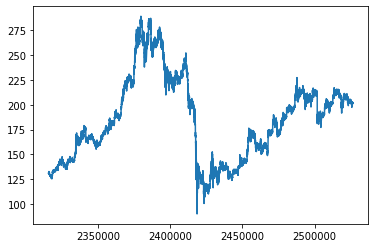

In [28]:
plt.scatter(test_data.index, test_data['predictions'], c='r')
plt.plot(test_data.index, test_data['close'])
plt.show()